# Comparison of the supervised models
    All the hyperparmeters values were entered below.
    The data was scaled.
    The AUC/ROC was calculated.
    The Accuracy was calculated for each.
    The best model was picked and the Recall and Prcision was calculated.
    The feature importance was also calculated.

    1.) Random Forest
    2.) Extreme Gradient Boost

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import plot_importance


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('lending_club_le.csv', index_col=0)
y = df['good_loan_status']
X = df.drop(['good_loan_status'], axis=1)

In [3]:
X.shape,y.shape

((73318, 68), (73318,))

In [4]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state = 42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58654, 68), (14664, 68), (58654,), (14664,))

------

# Model comparison of accuracy score

In [6]:
rf_final = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=30,
                                  min_samples_split=60,
                                  max_features=45,
                                  n_estimators=20)

In [7]:
# Let's see the accuracy scores for all of our models.
models = []
results = []
names = []
print('\t   Accuracy\n\t score\t  std')


models.append(('RFC', make_pipeline(preprocessing.StandardScaler(),
                                    PCA(n_components=50),
                                    RandomForestClassifier(bootstrap=True,
                                                           max_depth=10,
                                                           min_samples_leaf=30,
                                                           min_samples_split=60,
                                                           max_features=45,
                                                           n_estimators=20))))

models.append(('ADA', AdaBoostClassifier(base_estimator=rf_final,
                                         n_estimators=13)))

models.append(('XGB', make_pipeline(preprocessing.StandardScaler(),
                                    PCA(n_components=50),
                                    XGBClassifier(bootstrap=True,
                                                  max_depth=8,
                                                  n_estimators=30,
                                                  learning_rate=0.1,
                                                  subsample=0.2,
                                                  colsample_bytree=0.2,
                                                  colsample_bylevel=0.0001))))


for name, model in models:
    kfold = model_selection.KFold(n_splits=3, random_state=42)
    cv_results = model_selection.cross_val_score(model,
                                                 X_train,
                                                 y_train,
                                                 cv=3,
                                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s:\t%.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('----------------------------------------------------------\n')
for name, model in models:
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_test)
    names.append(name)
    print('\n', name, '\nconfusion matrix \n',
          confusion_matrix(y_test, y_pred2))
    print('\nholdout accuracy score: ', accuracy_score(y_test, y_pred2))
    print('\ncross validation scores: ',
          cross_val_score(model, X_test, y_test, cv=3))
    print('\n', classification_report(y_test, y_pred2))
    print('----------------------------------------------------------\n')

	   Accuracy
	 score	  std
RFC:	0.8381 (0.0004)
ADA:	0.8719 (0.0016)
XGB:	0.8042 (0.0031)
----------------------------------------------------------


 RFC 
confusion matrix 
 [[ 1014  2272]
 [   43 11335]]

holdout accuracy score:  0.8421303873431533

cross validation scores:  [0.83902639 0.82283142 0.84264375]

               precision    recall  f1-score   support

           0       0.96      0.31      0.47      3286
           1       0.83      1.00      0.91     11378

   micro avg       0.84      0.84      0.84     14664
   macro avg       0.90      0.65      0.69     14664
weighted avg       0.86      0.84      0.81     14664

----------------------------------------------------------


 ADA 
confusion matrix 
 [[ 1650  1636]
 [  218 11160]]

holdout accuracy score:  0.8735679214402619

cross validation scores:  [0.87052567 0.86518003 0.8723143 ]

               precision    recall  f1-score   support

           0       0.88      0.50      0.64      3286
           1       0.8

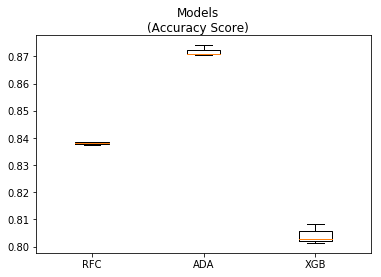

In [8]:
#Let's take a look at the Accuracy scores on a box plot
fig = plt.figure()
fig.suptitle('Models\n(Accuracy Score)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

_The models produce a very high accuracy score 99%.  The confusion matrix for the models are very stable so the models don't seem to be overfit._

----

# Model comparison of ROC-AUC score

In [9]:
# ROC-AUC scores for all of our models.
print('\t   ROC/AUC\n\t score\t  std')
results = []
names = []
names1 = []
models = []

models.append(('RFC', make_pipeline(preprocessing.StandardScaler(),
                                    PCA(n_components=50),
                                    RandomForestClassifier(bootstrap=True,
                                                           max_depth=10,
                                                           min_samples_leaf=30,
                                                           min_samples_split=60,
                                                           max_features=45,
                                                           n_estimators=20))))

models.append(('ADA', AdaBoostClassifier(base_estimator=rf_final,
                                         n_estimators=13)))

models.append(('XGB', make_pipeline(preprocessing.StandardScaler(),
                                    PCA(n_components=50),
                                    XGBClassifier(bootstrap=True,
                                                  max_depth=8,
                                                  n_estimators=30,
                                                  learning_rate=0.1,
                                                  subsample=0.2,
                                                  colsample_bytree=0.2,
                                                  colsample_bylevel=0.0001))))



for name, model in models:
    kfold = model_selection.KFold(n_splits=3, random_state=42)
    cv_results = model_selection.cross_val_score(model,
                                                 X_train,
                                                 y_train,
                                                 cv=3,
                                                 scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s:\t%.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
print('----------------------------------------------------------\n')
    
for name1, model1 in models:    
    model1.fit(X_train, y_train)
    y_pred2 = model1.predict(X_test)
    names1.append(name1)
    print('\n',name1,'\nconfusion matrix \n', confusion_matrix(y_test, y_pred2))
    print('\nholdout accuracy score: ', accuracy_score(y_test, y_pred2))
    print('\ncross validation scores: ',
          cross_val_score(model1, X_test, y_test, cv=3))
    print('\n', classification_report(y_test, y_pred2))
    print('----------------------------------------------------------\n')    

	   ROC/AUC
	 score	  std
RFC:	0.8238 (0.0005)
ADA:	0.8833 (0.0036)
XGB:	0.7610 (0.0034)
----------------------------------------------------------


 RFC 
confusion matrix 
 [[ 1018  2268]
 [   34 11344]]

holdout accuracy score:  0.8430169121658483

cross validation scores:  [0.8420945  0.82446809 0.84591774]

               precision    recall  f1-score   support

           0       0.97      0.31      0.47      3286
           1       0.83      1.00      0.91     11378

   micro avg       0.84      0.84      0.84     14664
   macro avg       0.90      0.65      0.69     14664
weighted avg       0.86      0.84      0.81     14664

----------------------------------------------------------


 ADA 
confusion matrix 
 [[ 1628  1658]
 [  212 11166]]

holdout accuracy score:  0.8724768139661757

cross validation scores:  [0.87482103 0.8643617  0.87210968]

               precision    recall  f1-score   support

           0       0.88      0.50      0.64      3286
           1       0.87

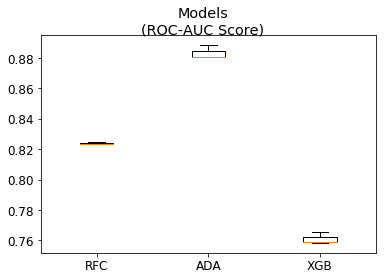

In [10]:
#Let's take a look at these ROC-AUC scores on a box plot
plt.rcParams['font.size'] = 12
fig = plt.figure()
fig.suptitle('Models\n(ROC-AUC Score)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

_All models are pretty stable and the accuracy is very high._

----

# Evaluation Random Forest

    - ROC curve plot
    - confusion matrix
    - F1Score
    - Feature importance

In [22]:
rf_final.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=45, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=60,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

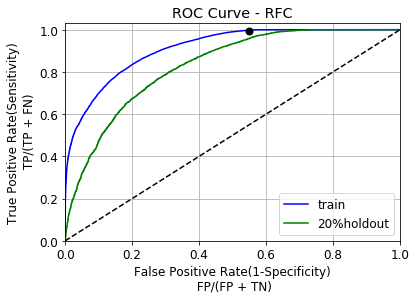

In [86]:
ypred_train = rf_final.predict_proba(X_train)[:, 1]
ypred_test = xgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, ypred_train)
fpr1, tpr1, thresholds = roc_curve(y_test, ypred_test)
x=fp/(fp+tn)
y=tp/(tp+fn)

plt.plot(fpr, tpr,color='b')
plt.plot(fpr1, tpr1,color='g',label="20%holdout")
plt.plot(x, y, 'ko', markersize=7)
plt.legend(['train', '20%holdout'])
plt.title('ROC Curve - RFC')
plt.xlabel('False Positive Rate(1-Specificity)\n FP/(FP + TN)')
plt.ylabel('True Positive Rate(Sensitivity)\n TP/(TP + FN)')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.03])
plt.grid(True)
plt.plot([0, 1], [0, 1],'k--')
#plt.tight_layout()
plt.show()

In [24]:
for var in ['precision', 'recall']:
    print('\n\t {} \n\t score\t  stdev'.format(var))
    results = []
    names = []
    models = []

    models.append(('RFC', make_pipeline(preprocessing.StandardScaler(),
                                    PCA(n_components=50),
                                    RandomForestClassifier(bootstrap=True,
                                                           max_depth=10,
                                                           min_samples_leaf=30,
                                                           min_samples_split=60,
                                                           max_features=45,
                                                           n_estimators=20))))


    for name, model in models:
        kfold = model_selection.KFold(n_splits=3, random_state=42)

        cv_results = model_selection.cross_val_score(
            model,
            X_train,
            y_train, cv=3, scoring=var)

        results.append(cv_results)
        names.append(name)
        msg = "%s:\t%.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


	 precision 
	 score	  stdev
RFC:	0.8287 (0.0005)

	 recall 
	 score	  stdev
RFC:	0.9961 (0.0004)


In [25]:
#F1score= 2 * (precision*recall) / (precision+recall)
Fmeasure = 2*(0.8287 * 0.9961) / (0.8287 + 0.9961)
print('F1score =  {0:.2%}'.format(Fmeasure))

F1score =  90.47%


In [26]:
confmtx = confusion_matrix(y_test, rf_final.predict(X_test))
tn, fp, fn, tp = [i for i in confmtx.ravel()]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2*(precision * recall) / (precision + recall)
print('Precision:\t{:.4f}\nRecall:\t\t{:.4f}\nF1 Score:\t{:.4}'.format(precision,recall,f1))

Precision:	0.8624
Recall:		0.9938
F1 Score:	0.9234


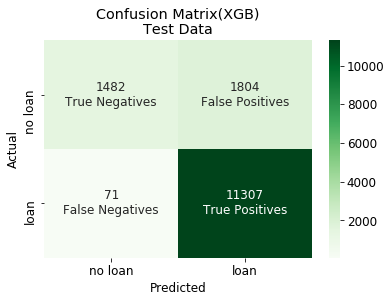

In [65]:
plt.rcParams['font.size'] = 12
plt.subplot(111)
ax = sns.heatmap(confmtx, annot=True, cmap='Greens',  
    annot_kws={"size": 12}, fmt='g')
labels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for k,v in enumerate(ax.texts):
    v.set_text(v.get_text() + "\n" + labels[k])
plt.title('Confusion Matrix(XGB)\nTest Data')
ax.xaxis.set_ticklabels(['no loan', 'loan']); ax.yaxis.set_ticklabels(['no loan', 'loan']);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

___Random Forest Feature Importance___

In [28]:
headers = ["feature", "score"]
values = sorted(zip(X_train.columns, rfc_feat.feature_importances_), key=lambda x: x[1] * -1)
dfFeat = pd.DataFrame(np.array(values),columns = list(headers))
dfFeat.head(10)

,feature,score
0,out_prncp,0.6253329955352591
1,months_since_last_credit_pull_d,0.09141171716766544
2,sub_grade,0.06143959015048138
3,grade,0.042495192158391475
4,months_since_issue_d,0.030847211581819044
5,installment,0.016716730918714492
6,loan_amnt,0.015565864572743903
7,tot_hi_cred_lim,0.009829502311594851
8,term,0.008767860310670974
9,mort_acc,0.005787459592058868


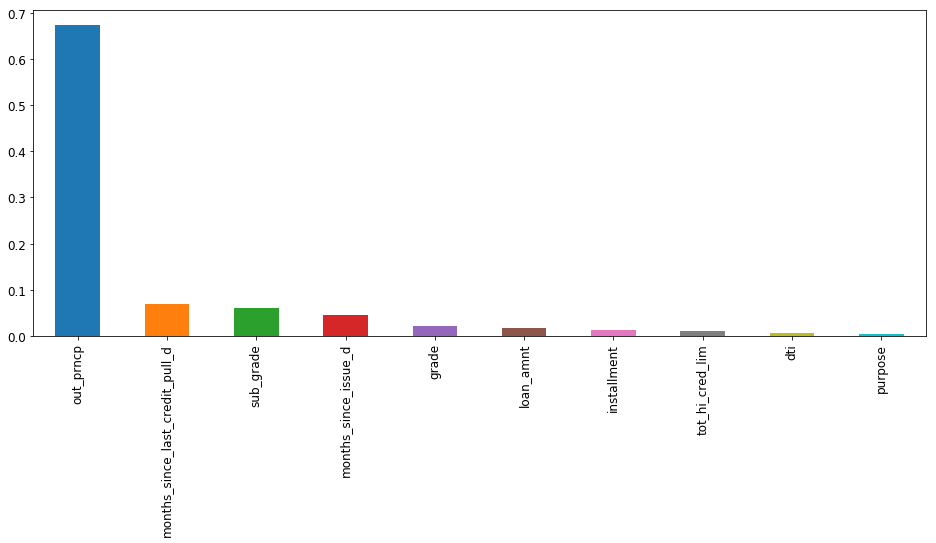

In [30]:
plt.figure(figsize=(16,6))

feat_importances = pd.Series(rf_final.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='bar');

# Evaluation XGB

    - ROC curve plot
    - confusion matrix
    - F1Score
    - Feature importance

In [11]:
#Print the ROC curve
ax = fig.add_subplot(2,2,2)
xgb = make_pipeline(preprocessing.StandardScaler(),
                                    PCA(n_components=50),
                                    XGBClassifier(bootstrap=True,
                                                  max_depth=5,
                                                  n_estimators=30,
                                                  learning_rate=0.5,
                                                  subsample=0.2,
                                                  colsample_bytree=0.6,
                                                  colsample_bylevel=0.8))
xgb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
     ...      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.2))])

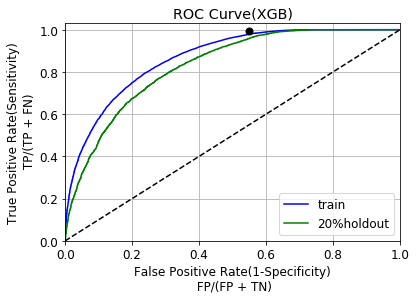

In [87]:
ypred_train = xgb.predict_proba(X_train)[:, 1]
ypred_test = xgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, ypred_train)
fpr1, tpr1, thresholds = roc_curve(y_test, ypred_test)
x=fp/(fp+tn)
y=tp/(tp+fn)
plt.plot(fpr, tpr,color='b')
plt.plot(fpr1, tpr1,color='g',label="20%holdout")
plt.plot(x,y, 'ko', markersize=7)
plt.legend(['train', '20%holdout'])
plt.title('ROC Curve(XGB)')
plt.xlabel('False Positive Rate(1-Specificity)\n FP/(FP + TN)')
plt.ylabel('True Positive Rate(Sensitivity)\n TP/(TP + FN)')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.03])
plt.grid(True)
plt.plot([0, 1], [0, 1],'k--')
#plt.tight_layout()
plt.show()

In [13]:
for var in ['precision', 'recall']:
    print('\n\t {} \n\t score\t  stdev'.format(var))
    results = []
    names = []
    models = []

    models.append(('XGB', make_pipeline(preprocessing.StandardScaler(),
                                    PCA(n_components=50),
                                    XGBClassifier(bootstrap=True,
                                                  max_depth=5,
                                                  n_estimators=30,
                                                  learning_rate=0.5,
                                                  subsample=0.2,
                                                  colsample_bytree=0.6,
                                                  colsample_bylevel=0.8))))

    for name, model in models:
        kfold = model_selection.KFold(n_splits=3, random_state=42)

        cv_results = model_selection.cross_val_score(
            model,
            X_train,
            y_train, cv=3, scoring=var)

        results.append(cv_results)
        names.append(name)
        msg = "%s:\t%.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


	 precision 
	 score	  stdev
XGB:	0.8567 (0.0007)

	 recall 
	 score	  stdev
XGB:	0.9372 (0.0024)


*  Precision(positive predictive value) `TP/(TP + FP)` - What percent of positive predictions were correct?  85.52%   `TP/(TP + FP)`

*  Recall(sensitivity) `TP/(TP + FN)` - What percent of the positive cases did you catch?  

`F1Score =  2 * (precision*recall) / (precision+recall)`


In [21]:
#F1score= 2 * (precision*recall) / (precision+recall)
Fmeasure = 2*(0.8567 * 0.9372) / (0.8567 + 0.9372)
print('F1score =  {0:.2%}'.format(Fmeasure))

F1score =  89.51%


In [15]:
confmtx = confusion_matrix(y_test, xgb.predict(X_test))
tn, fp, fn, tp = [i for i in confmtx.ravel()]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2*(precision * recall) / (precision + recall)
print('Precision:\t{:.4f}\nRecall:\t\t{:.4f}\nF1 Score:\t{:.4}'.format(precision,recall,f1))

Precision:	0.8621
Recall:		0.9439
F1 Score:	0.9012


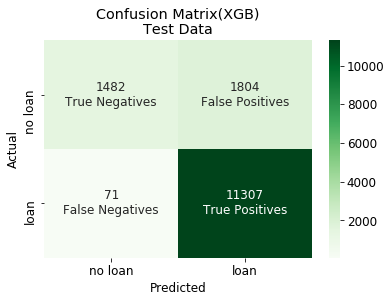

In [66]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix#51163585
#https://tatwan.github.io/How-To-Plot-A-Confusion-Matrix-In-Python/
plt.rcParams['font.size'] = 12
plt.subplot(111)
ax = sns.heatmap(confmtx, annot=True, cmap='Greens',  
    annot_kws={"size": 12}, fmt='g')
labels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
#classNames = ['Negative','Positive']
#tick_marks = np.arange(len(classNames))
#plt.xticks(tick_marks, classNames)
#plt.yticks(tick_marks, classNames)
for k,v in enumerate(ax.texts):
    v.set_text(v.get_text() + "\n" + labels[k])
plt.title('Confusion Matrix(XGB)\nTest Data')
ax.xaxis.set_ticklabels(['no loan', 'loan']); ax.yaxis.set_ticklabels(['no loan', 'loan']);

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show();

---

# Feature Importance

___XGB Feture Importance___

In [17]:
xgb_feat = XGBClassifier(bootstrap=True,
                    max_depth=5,
                    n_estimators=30,
                    learning_rate=0.5,
                    subsample=0.2,
                    colsample_bytree=0.6,
                    colsample_bylevel=0.8)

xgb_feat.fit(X_train, y_train)

xgb_fea_imp=pd.DataFrame(list(xgb_feat.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
xgb_fea_imp.head(10)

,feature,importance
23,max_bal_bc,31
25,mo_sin_old_rev_tl_op,31
18,dti,30
2,months_since_last_credit_pull_d,29
1,sub_grade,27
30,revol_util,26
14,bc_open_to_buy,25
6,avg_cur_bal,23
5,months_since_issue_d,23
8,installment,21


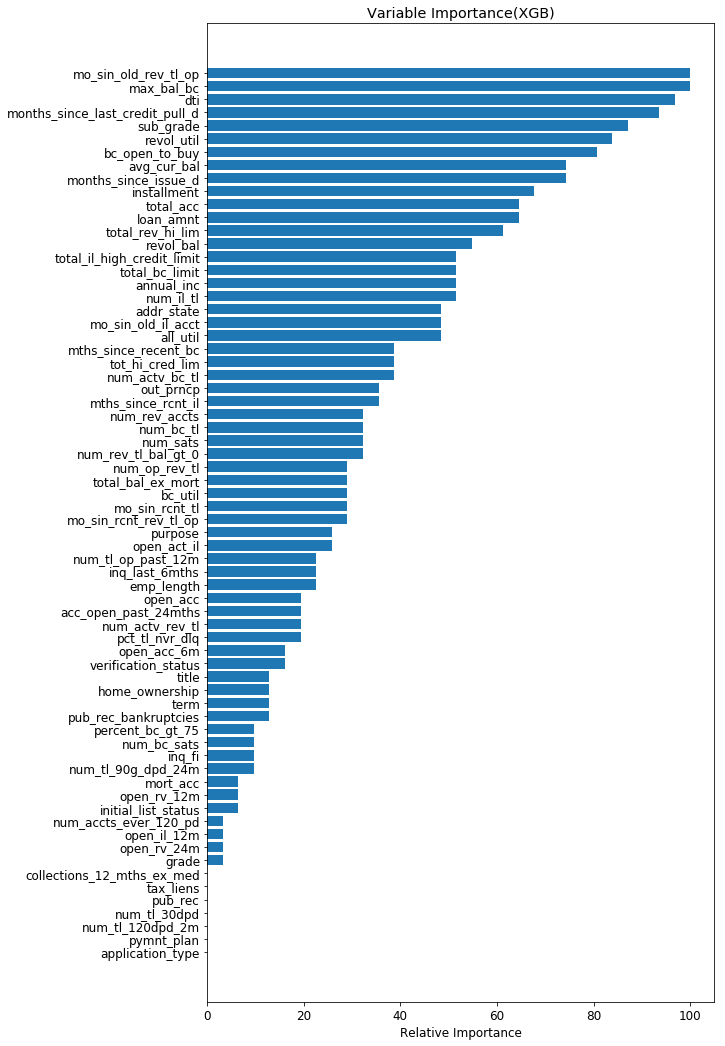

In [88]:
fig = plt.figure(figsize=(20, 18))
feature_importance = xgb_feat.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance(XGB)')
plt.show()

_There are a few features without any importance that can be removed_

___Random Forest Feature Importance___

In [19]:
rfc_feat = RandomForestClassifier(bootstrap=True,
                                           max_depth=10,
                                           max_features=15,
                                           min_samples_leaf=30,
                                           min_samples_split=25,
                                           n_estimators=10)
rfc_feat.fit(X_train, y_train)

headers = ["feature", "score"]
values = sorted(zip(X_train.columns, rfc_feat.feature_importances_), key=lambda x: x[1] * -1)
dfFeat = pd.DataFrame(np.array(values),columns = list(headers))
dfFeat.head(10)

,feature,score
0,out_prncp,0.6253329955352591
1,months_since_last_credit_pull_d,0.09141171716766544
2,sub_grade,0.06143959015048138
3,grade,0.042495192158391475
4,months_since_issue_d,0.030847211581819044
5,installment,0.016716730918714492
6,loan_amnt,0.015565864572743903
7,tot_hi_cred_lim,0.009829502311594851
8,term,0.008767860310670974
9,mort_acc,0.005787459592058868


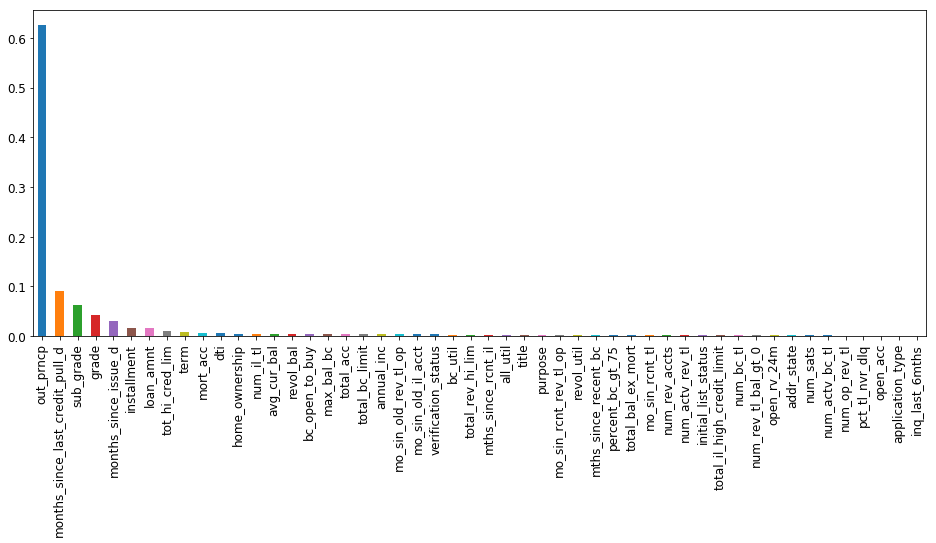

In [89]:
plt.figure(figsize=(16,6))

feat_importances = pd.Series(rfc_feat.feature_importances_, index=X_train.columns)
feat_importances.nlargest(50).plot(kind='bar');

___Both XGB and Random Forest have the same 5 top features that determine a good loan.___

# Conclusion
The model is able to predict that a loan will be paid back 80% of the time.  RFC miscladssified 2,315 loans while XGB 1,875 loans.  ADA boost was use on the tuned RFC model and increased the accuracy a little.  But all models had a weighted average of ~85%.  For all the models comparing their cross validation scores with the accuracy score the models are not over or under fit. 

The models can be tuned more by dropping more of the features that don't even rank in feature importance as we see in the RFC plot above.  And for the XGB model, there is one feature that out weighs all the features that we may need to remove and run the model again.

If I have time I will drop the features and see if I can increase the accuracy scores.
